In [301]:
# from google.colab import files
# files.upload()

In [302]:
# from google.colab import drive
# drive.mount('/content/drive')


In [303]:
# data_dir = "/content/drive/My Drive/Deep_Learning_Project/Data"


In [304]:
# import pandas as pd

# train_data = pd.read_csv(data_dir + "/emnist-letters-train.csv")
# test_data  = pd.read_csv(data_dir + "/emnist-letters-test.csv")

In [305]:
import os

for root, dirs, files in os.walk('/kaggle/input'):
    for f in files:
        print(os.path.join(root, f))


/kaggle/input/emnist-letters/emnist-letters-test.csv
/kaggle/input/emnist-letters/emnist-letters-train.csv


In [306]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [307]:
test_data = pd.read_csv(r"/kaggle/input/emnist-letters/emnist-letters-test.csv", header=None)
train_data = pd.read_csv(r"/kaggle/input/emnist-letters/emnist-letters-train.csv", header=None)

In [308]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [309]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
#unique values in label columns
number_of_labels = train_data['label'].nunique()

In [311]:
train_data.shape

(88800, 785)

In [312]:
test_data.shape

(14800, 785)

In [313]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [315]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train_raw = train_data['label'].values


print("Features shape:", X_train.shape)
print("Labels shape:", y_train_raw.shape)


Features shape: (88800, 784)
Labels shape: (88800,)


In [316]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test_raw = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test_raw.shape)

Features shape: (14800, 784)
Labels shape: (14800,)


In [317]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# Y_train = Y_train.to_numpy()
# Y_test = Y_test.to_numpy()

# Reshape
# X_train = X_train.reshape(-1,28,28,1)
# X_test = X_test.reshape(-1,28,28,1)
# print("x_train shape: ",X_train.shape)
# print("x_test shape: ",X_test.shape)

In [318]:

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)


x_train shape:  (88800, 28, 28, 1)
x_test shape:  (14800, 28, 28, 1)


In [319]:
# X_train = np.transpose(X_train, (0, 2, 1, 3))
# X_train = np.flip(X_train, axis=2)

# X_test = np.transpose(X_test, (0, 2, 1, 3))
# X_test = np.flip(X_test, axis=2)

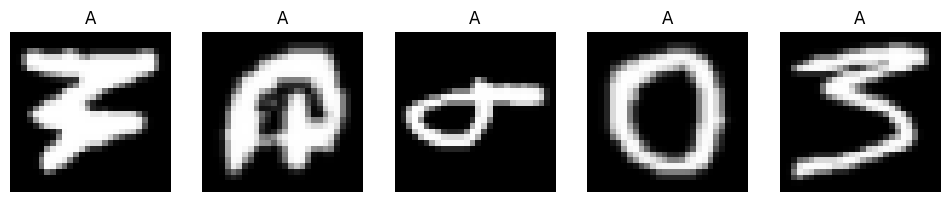

In [320]:
show_samples(X_train, y_train_raw, n=5)

In [321]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

In [322]:
# Normlization
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [323]:
# import cv2
# import numpy as np

# X_train_uint8 = (X_train).astype('uint8')
# X_test_uint8 = (X_test).astype('uint8')

# X_train = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), (32, 32)) for img in X_train_uint8])
# X_test = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), (32, 32)) for img in X_test_uint8])

# print(X_train.shape, X_test.shape)

# One Hot Encoding

In [324]:
y_train = to_categorical(y_train_raw - 1, num_classes=26)
y_test  = to_categorical(y_test_raw - 1, num_classes=26)

# Shuffling the training dataset

In [325]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [326]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (79920, 28, 28, 1) (79920, 26)
Validation set: (8880, 28, 28, 1) (8880, 26)


# Visualizing sum samples

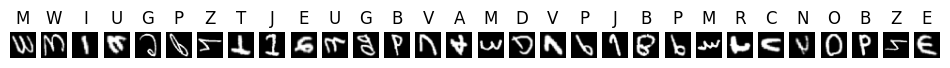

In [327]:
show_samples(X_train, y_train, n=30)

# Initialize the model

In [328]:
model_vgg = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# VGG 19

In [329]:
# # import tensorflow as tf
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# def build_vgg19_from_scratch(input_shape=(32, 32, 3), num_classes=26):
#     model_vgg = Sequential()

#     # Block 1
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 2
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 3
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 4
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 5
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Fully Connected Layers
#     model_vgg.add(Flatten())
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(num_classes, activation='softmax')) # For classification

#     return model_vgg

# model_vgg = build_vgg19_from_scratch()


# Compile the model

In [330]:
model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [331]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True
    )
]


In [332]:
history = model_vgg.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7769 - loss: 0.7573 - val_accuracy: 0.9007 - val_loss: 0.2838
Epoch 2/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9210 - loss: 0.2341 - val_accuracy: 0.9282 - val_loss: 0.1969
Epoch 3/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9337 - loss: 0.1973 - val_accuracy: 0.9342 - val_loss: 0.1893
Epoch 4/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9394 - loss: 0.1740 - val_accuracy: 0.9376 - val_loss: 0.1732
Epoch 5/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9443 - loss: 0.1579 - val_accuracy: 0.9374 - val_loss: 0.1827
Epoch 6/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9487 - loss: 0.1429 - val_accuracy: 0.9411 - val_loss: 0.1709
Epoch 7/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9521 - loss: 0.1258 - val_accuracy: 0.9411 - val_loss: 0.1782
Epoch 8/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9554 - loss: 0.1190 

In [333]:
# save final model
model.save('final_emnist_vgg.h5')

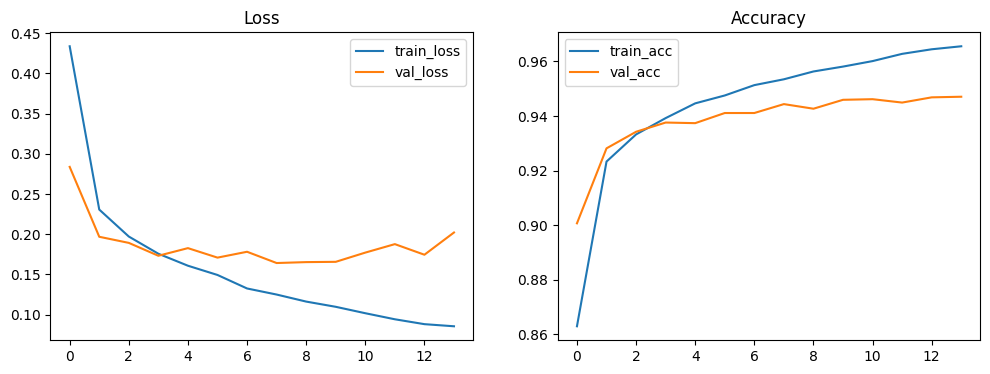

In [334]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [335]:
test_loss, test_acc = model_vgg.evaluate(X_test, y_test, verbose=1)
print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_acc)


463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9408 - loss: 0.2050
Final Test Loss: 0.2079182267189026
Final Test Accuracy: 0.9333108067512512


463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


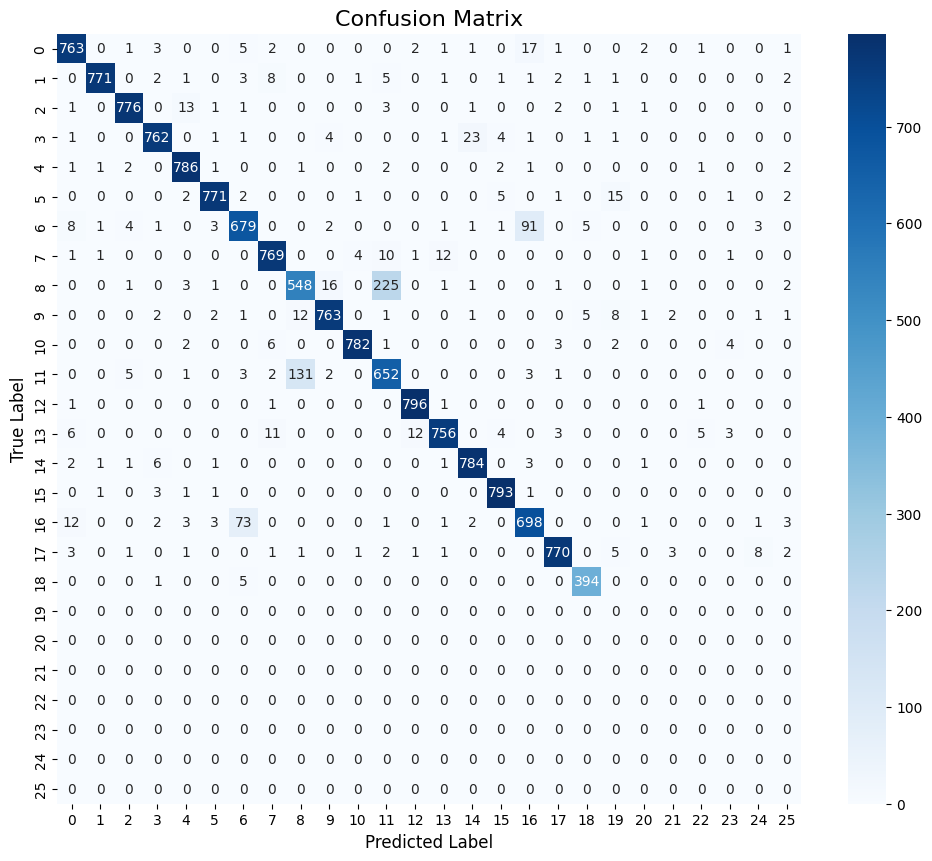

In [337]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model_vgg.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Show some misclassified examples

Number of misclassified: 987


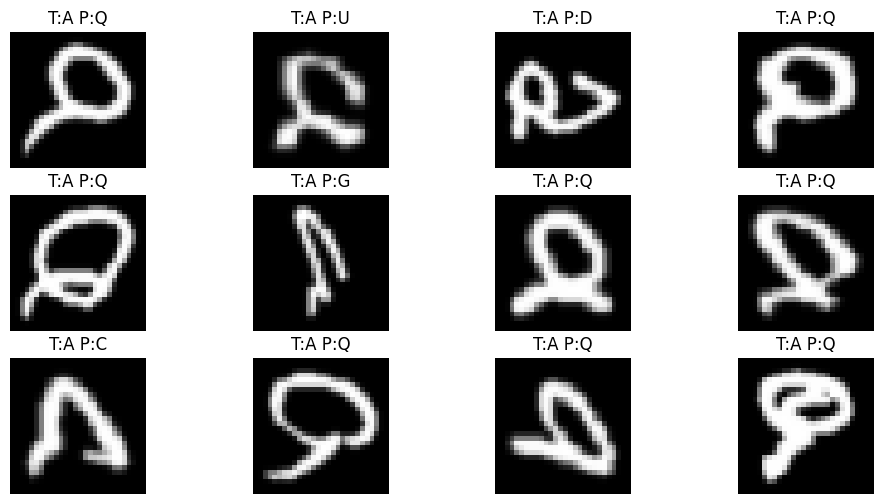

In [338]:
mis_idx = np.where(y_pred != y_true)[0]
print('Number of misclassified:', len(mis_idx))


n_show = min(12, len(mis_idx))
plt.figure(figsize=(12,6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28).T, cmap='gray')
    # plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f'T:{chr(ord("A")+y_true[idx])} P:{chr(ord("A")+y_pred[idx])}')
    plt.axis('off')
plt.show()

# After optimizing some misclassified examples

Total misclassified: 987


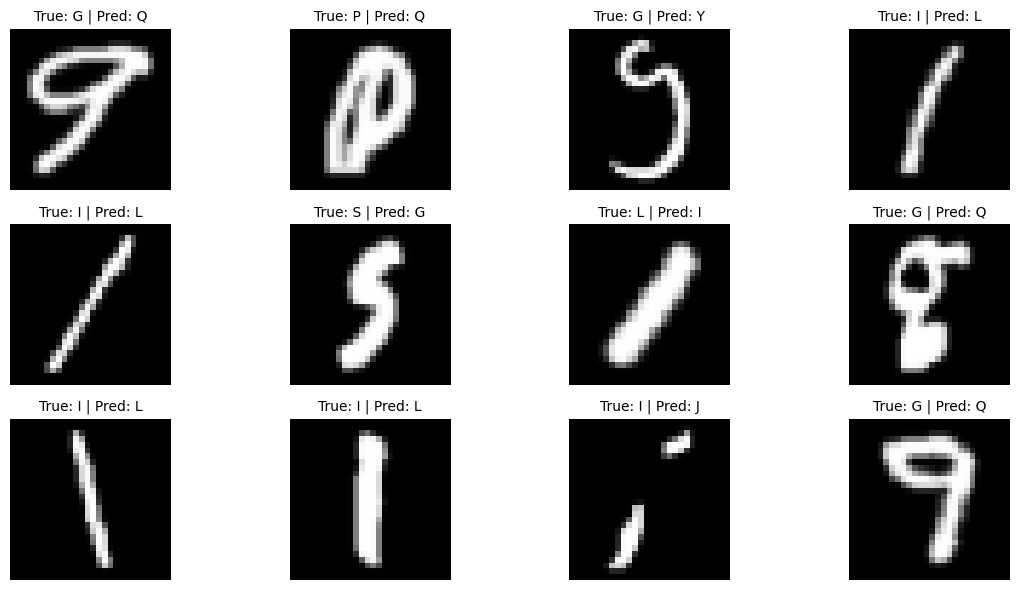

In [339]:
mis_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(mis_idx)

print(f'Total misclassified: {len(mis_idx)}')
n_show = min(12, len(mis_idx))
plt.figure(figsize=(12, 6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i + 1)
    img = X_test[idx].reshape(28, 28)
    img = np.rot90(img.T, k=1)
    plt.imshow(img, cmap='gray')

    true_char = chr(ord("A") + y_true[idx])
    pred_char = chr(ord("A") + y_pred[idx])

    plt.title(f'True: {true_char} | Pred: {pred_char}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# This indicates that about 5% of EMNIST letters dataset looks like the messy examples above.

# ResNet

In [340]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [341]:
from tensorflow.keras.preprocessing.image import smart_resize

X_train_resnet = smart_resize(X_train, (64, 64))
X_val_resnet = smart_resize(X_val, (64, 64))
X_test_resnet = smart_resize(X_test, (64, 64))


In [342]:
print("X_train shape:", X_train_resnet.shape)
print("X_val shape:", X_val_resnet.shape)
print("X_test shape:", X_test_resnet.shape)


X_train shape: (79920, 64, 64, 1)
X_val shape: (8880, 64, 64, 1)
X_test shape: (14800, 64, 64, 1)


In [343]:
num_classes = 26  # EMNIST letters 1–26

# reshape to NHWC and normalize
# X_train = X_train / 255.
# X_val   = X_val / 255.
# X_test  = X_test/ 255.

# y_train_cat = to_categorical(y_train)
# y_val_cat   = to_categorical(y_val)
# y_test_cat  = to_categorical(y_test)

inputs = Input(shape=(64, 64, 1))

# 1) Resize to 224x224 for ResNet
x = layers.Resizing(224, 224)(inputs)

# 2) Convert grayscale → RGB (3 channels)
x = layers.Conv2D(3, (3, 3), padding='same')(x)

In [344]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # basic transfer learning
x = base_model(x, training=False)

# classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

resnet_model = models.Model(inputs, outputs, name="ResNet50_Transfer")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [345]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()


Model: "ResNet50_Transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 224, 224, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,118,968 (92.01 MB)

 Trainable params: 531,256 (2.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [346]:
history_resnet = resnet_model.fit(
    X_train_resnet, y_train,
    validation_data=(X_val_resnet, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 246s 180ms/step - accuracy: 0.1911 - loss: 2.6910 - val_accuracy: 0.7374 - val_loss: 0.9435
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 209s 168ms/step - accuracy: 0.5522 - loss: 1.3644 - val_accuracy: 0.8175 - val_loss: 0.6376
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 211s 169ms/step - accuracy: 0.6495 - loss: 1.0670 - val_accuracy: 0.8380 - val_loss: 0.5252
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 212s 170ms/step - accuracy: 0.6972 - loss: 0.9231 - val_accuracy: 0.8560 - val_loss: 0.4525
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 209s 167ms/step - accuracy: 0.7266 - loss: 0.8320 - val_accuracy: 0.8623 - val_loss: 0.4332
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - accuracy: 0.7407 - loss: 0.7904 - val_accuracy: 0.8707 - val_loss: 0.4023
Epoch 7/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - accuracy: 0.7476 - loss: 0.7650 - val_accuracy: 0.8780 - val_loss: 0.3871
Epoch 8/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - ac

In [347]:
y_proba = resnet_model.predict(X_test_resnet)
y_pred = np.argmax(y_proba, axis=1)
y_true = y_test


463/463 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step


In [348]:
# report = classification_report(y_true, y_pred, output_dict=False)
# print(report)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [349]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - ResNet50")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [350]:
# Binarize labels for ROC
y_test_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Compute AUC
auc_macro = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
auc_micro = roc_auc_score(y_test_bin, y_proba, average="micro", multi_class="ovr")
print("AUC Macro:", auc_macro)
print("AUC Micro:", auc_micro)

# Plot ROC for first few classes
plt.figure(figsize=(10,8))
for i in range(min(num_classes, 5)):  # plot first 5 to avoid clutter
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.title("ROC Curves (first 5 classes) - ResNet50")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
resnet_model.save("resnet50_emnist_transfer.keras")


# MobileNet

In [352]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input

In [353]:
# Build MobileNet Model

def build_mobilenet_model(input_shape=(28, 28, 1), num_classes=26):
    inputs = Input(shape=input_shape)

    x = layers.Resizing(32, 32)(inputs)

    x = layers.Conv2D(3, (3, 3), padding='same')(x)

    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3)
    )

    base_model.trainable = True

    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="MobileNet_Custom")
    return model

model = build_mobilenet_model()

/tmp/ipykernel_47/3242291643.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [354]:
# Compile & Train

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Low LR for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [355]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, monitor='val_loss')
]
print(model.summary())

Model: "MobileNet_Custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 26)             │        33,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,320 (8.74 MB)

 Trainable params: 2,257,208 (8.61 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [356]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/20


E0000 00:00:1765318896.256441     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.428963     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.754004     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.938071     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1248/1249 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4106 - loss: 2.2128

E0000 00:00:1765318935.997705     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.169023     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.493084     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.675469     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1249/1249 ━━━━━━━━━━━━━━━━━━━━ 88s 38ms/step - accuracy: 0.4109 - loss: 2.2115 - val_accuracy: 0.1626 - val_loss: 2.8002 - learning_rate: 1.0000e-04
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8328 - loss: 0.5352 - val_accuracy: 0.7643 - val_loss: 1.0880 - learning_rate: 1.0000e-04
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8877 - loss: 0.3435 - val_accuracy: 0.9057 - val_loss: 0.3483 - learning_rate: 1.0000e-04
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9084 - loss: 0.2730 - val_accuracy: 0.9177 - val_loss: 0.2499 - learning_rate: 1.0000e-04
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9219 - loss: 0.2314 - val_accuracy: 0.9243 - val_loss: 0.2242 - learning_rate: 1.0000e-04
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9272 - loss: 0.2119 - val_accuracy: 0.9258 - val_loss: 0.2135 - learning_rate: 1.0000e-04
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/

In [357]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9470 - loss: 0.2081
Test accuracy: 0.9351


In [358]:
# from sklearn.metrics import classification_report

# report = classification_report(y_true, y_pred, target_names=class_names)
# print("Classification Report:\n")
# print(report)

In [359]:
unique_labels, counts = np.unique(y_test_raw, return_counts=True)
print("Unique labels in test set:", unique_labels)
print("Counts of each label:", dict(zip(unique_labels, counts)))

Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counts of each label: {1: 800, 2: 800, 3: 800, 4: 800, 5: 800, 6: 800, 7: 800, 8: 800, 9: 800, 10: 800, 11: 800, 12: 800, 13: 800, 14: 800, 15: 800, 16: 800, 17: 800, 18: 800, 19: 400}


Observation:
The test dataset used for evaluation is incomplete. It only contains samples for the first 19 classes (labels 1 to 19, corresponding to letters A through S).

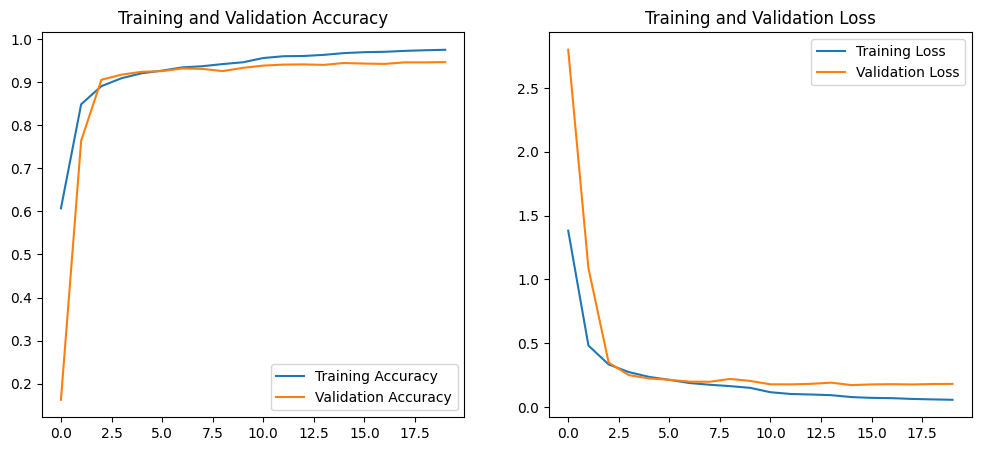

In [360]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


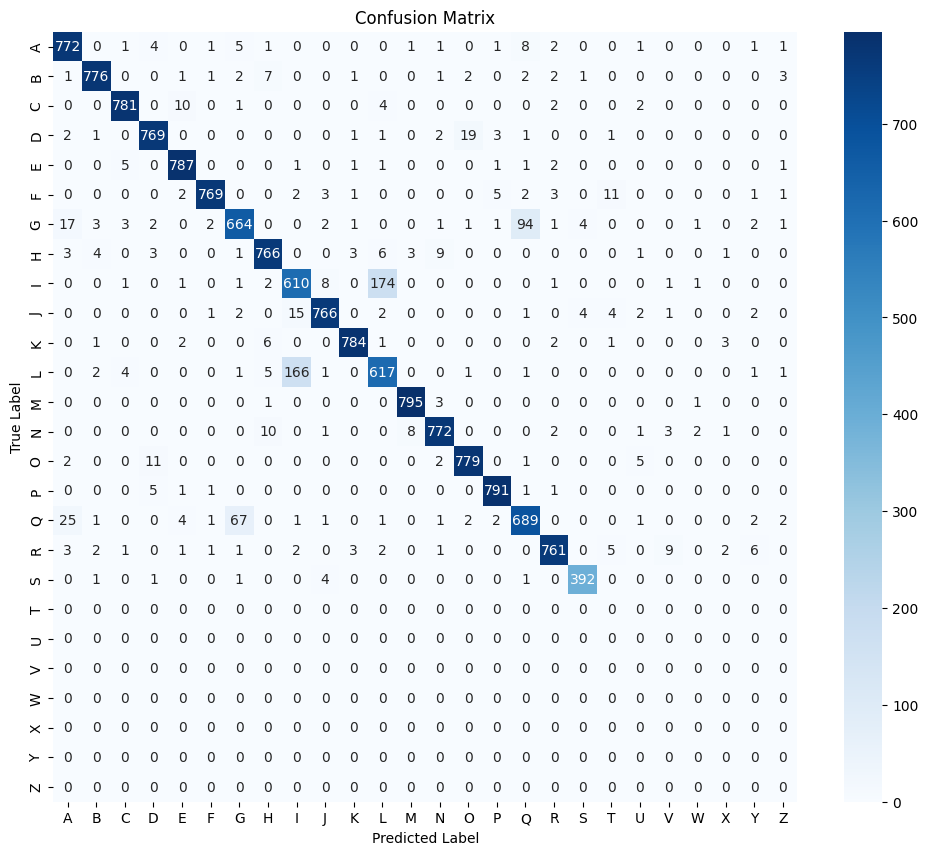

In [361]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
class_names = [chr(ord('A') + i) for i in range(26)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

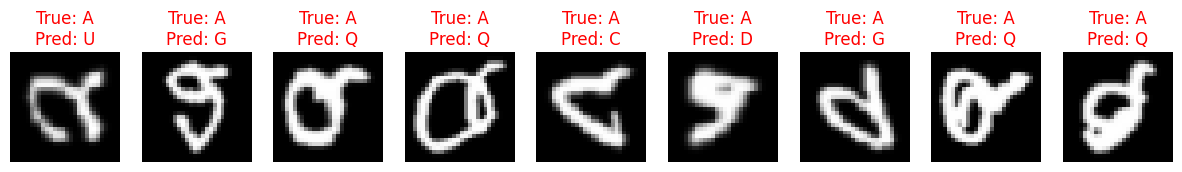

In [362]:
incorrect_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 5))
for i, incorrect_idx in enumerate(incorrect_indices[:9]):
    ax = plt.subplot(1, 9, i + 1)
    plt.imshow(X_test[incorrect_idx].squeeze(), cmap='gray')
    true_label = chr(ord('A') + y_true[incorrect_idx])
    pred_label = chr(ord('A') + y_pred[incorrect_idx])
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')
plt.show()

In [363]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [364]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1249 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.9242 - loss: 0.2430 - val_accuracy: 0.9463 - val_loss: 0.1787 - learning_rate: 6.2500e-06
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9337 - loss: 0.1920 - val_accuracy: 0.9437 - val_loss: 0.1757 - learning_rate: 6.2500e-06
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9352 - loss: 0.1825 - val_accuracy: 0.9420 - val_loss: 0.1741 - learning_rate: 6.2500e-06
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9390 - loss: 0.1671 - val_accuracy: 0.9436 - val_loss: 0.1713 - learning_rate: 6.2500e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9399 - loss: 0.1653 - val_accuracy: 0.9422 - val_loss: 0.1685 - learning_rate: 6.2500e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.9386 - loss: 0.1660 - val_accuracy: 0.9431 - val_loss: 0.1651 - learning_rate: 6.2500e-06


In [365]:
for layer in model.layers[-40:]:
    if hasattr(layer, "trainable"):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nFine-Tuning started...\n")

history_ft = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)


Fine-Tuning started...

Epoch 1/10


E0000 00:00:1765319664.097096     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.268390     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.590023     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.772051     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2495/2498 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9623 - loss: 0.0947

E0000 00:00:1765319721.672327     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319721.843816     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319722.161815     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319722.344087     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2498/2498 ━━━━━━━━━━━━━━━━━━━━ 106s 26ms/step - accuracy: 0.9623 - loss: 0.0947 - val_accuracy: 0.9458 - val_loss: 0.1758 - learning_rate: 1.0000e-05
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9642 - loss: 0.0877 - val_accuracy: 0.9450 - val_loss: 0.1780 - learning_rate: 1.0000e-05
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9650 - loss: 0.0870 - val_accuracy: 0.9455 - val_loss: 0.1771 - learning_rate: 1.0000e-05
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9675 - loss: 0.0819 - val_accuracy: 0.9445 - val_loss: 0.1799 - learning_rate: 5.0000e-06
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9679 - loss: 0.0792 - val_accuracy: 0.9441 - val_loss: 0.1813 - learning_rate: 5.0000e-06
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9684 - loss: 0.0774 - val_accuracy: 0.9457 - val_loss: 0.1788 - learning_rate: 2.5000e-06


In [366]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1
)

datagen.fit(X_train)

In [367]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 73s 36ms/step - accuracy: 0.9543 - loss: 0.1208 - val_accuracy: 0.9462 - val_loss: 0.1751 - learning_rate: 2.5000e-06
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9533 - loss: 0.1204 - val_accuracy: 0.9437 - val_loss: 0.1777 - learning_rate: 2.5000e-06
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9547 - loss: 0.1190 - val_accuracy: 0.9436 - val_loss: 0.1755 - learning_rate: 2.5000e-06
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9561 - loss: 0.1149 - val_accuracy: 0.9441 - val_loss: 0.1746 - learning_rate: 1.2500e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.9566 - loss: 0.1128 - val_accuracy: 0.9431 - val_loss: 0.1745 - learning_rate: 1.2500e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9565 - loss: 0.1134 - val_accuracy: 0.9438 - val_loss: 0.1735 - learning_rate: 1.2500e-06


## VIT

In [368]:
# Vision Transformer (ViT) for EMNIST letters (28x28x1 → 26 classes)

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26,
    image_size=28,
    patch_size=4,           # 28 / 4 = 7 → 49 patches
    projection_dim=64,
    transformer_layers=4,
    num_heads=4,
    transformer_units=[128, 64],   # MLP inside transformer
    mlp_head_units=[256, 128],     # final classification head
    dropout_rate=0.1
):
    inputs = keras.Input(shape=input_shape)

    # 1) Patch embedding using a Conv2D with stride = patch_size
    # Output shape: (batch, 7, 7, projection_dim) for 28x28 with patch_size=4
    x = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding="valid"
    )(inputs)  # (batch, H', W', projection_dim)

    # Flatten patches: (batch, num_patches, projection_dim)
    num_patches = (image_size // patch_size) ** 2  # 49
    x = layers.Reshape((num_patches, projection_dim))(x)

    # 2) Add learnable positional embeddings
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_embedding_layer = layers.Embedding(
        input_dim=num_patches,
        output_dim=projection_dim
    )
    position_embeddings = pos_embedding_layer(positions)  # (num_patches, projection_dim)
    x = x + position_embeddings  # broadcast over batch

    # 3) Transformer encoder blocks
    for _ in range(transformer_layers):
        # Layer norm before attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)

        # Multi-head self-attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim,
            dropout=dropout_rate
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, x])

        # Layer norm + MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        for units in transformer_units:
            x3 = layers.Dense(units, activation="gelu")(x3)
            x3 = layers.Dropout(dropout_rate)(x3)

        # Second skip connection
        x = layers.Add()([x2, x3])

    # 4) Classification head
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling over the patch tokens
    x = layers.GlobalAveragePooling1D()(x)

    # MLP head
    for units in mlp_head_units:
        x = layers.Dense(units, activation="gelu")(x)
        x = layers.Dropout(dropout_rate)(x)

    # Final classifier
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="vit_emnist_letters")
    return model

# Instantiate the ViT model
model = create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26
)

# Compile it (you can tweak optimizer/lr later)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "vit_emnist_letters"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 7, 7, 64)  │      1,088 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 49, 64)    │          0 │ conv2d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 49, 64)    │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 49, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 49, 128)   │          0 │ dense_25[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 49, 64)    │      8,256 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 49, 64)    │          0 │ dense_26[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 49, 64)    │          0 │ add_1[0][0],      │
│                     │                   │            │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 49, 128)   │          0 │ dense_27[0][0]  

 Total params: 386,906 (1.48 MB)

 Trainable params: 386,906 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [369]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.2137 - loss: 2.5540 - val_accuracy: 0.6110 - val_loss: 1.1730 - learning_rate: 0.0010
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.5895 - loss: 1.2563 - val_accuracy: 0.7358 - val_loss: 0.7857 - learning_rate: 0.0010
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6904 - loss: 0.9465 - val_accuracy: 0.8025 - val_loss: 0.5840 - learning_rate: 0.0010
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7453 - loss: 0.7771 - val_accuracy: 0.8196 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7681 - loss: 0.6999 - val_accuracy: 0.8256 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7844 - loss: 0.6543 - val_accuracy: 0.8355 - val_loss: 0.4802 - learning_rate: 0.0010
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accura

KeyboardInterrupt: 

# inception V1

In [370]:
import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Torch: 2.6.0+cu124
Torchvision: 0.21.0+cu124


In [371]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models, transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [372]:
class EMNISTDataset(Dataset):
    def __init__(self, df, transform=None):
        self.labels = df.iloc[:, 0].values - 1   # letters are 1–26 → convert to 0–25
        self.images = df.iloc[:, 1:].values.astype(np.uint8)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = self.images[idx].reshape(28, 28)   # grayscale
        img = np.stack([img, img, img], axis=2)  # 3 channels

        img = Image.fromarray(img)

        if self.transform:
            img = self.transform(img)

        label = torch.tensor(self.labels[idx]).long()
        return img, label


In [373]:
train_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

test_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])


In [374]:
full_ds = EMNISTDataset(train_data, transform=train_tf)

n_total = len(full_ds)
n_train = int(0.8 * n_total)
n_val   = int(0.1 * n_total)
n_test  = n_total - n_train - n_val

train_ds, val_ds, test_ds = random_split(
    full_ds, [n_train, n_val, n_test],
    generator=torch.Generator().manual_seed(123)
)

val_ds.dataset.transform = test_tf
test_ds.dataset.transform = test_tf

print("Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))


Train: 71040 Val: 8880 Test: 8880


In [375]:
batch_size = 64

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [376]:
model = models.googlenet(
    weights=models.GoogLeNet_Weights.IMAGENET1K_V1,
    aux_logits=True
)

num_classes = 26

# main classifier
model.fc = nn.Linear(model.fc.in_features, num_classes)

# auxiliary classifiers
model.aux1.fc2 = nn.Linear(model.aux1.fc2.in_features, num_classes)
model.aux2.fc2 = nn.Linear(model.aux2.fc2.in_features, num_classes)

model = model.to(device)


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 57.2MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/googlenet.py:341: UserWarning: auxiliary heads in the pretrained googlenet model are NOT pretrained, so make sure to train them
  warnings.warn(


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3)

best_acc = 0
best_model_path = "googlenet_emnist_best.pth"
epochs = 10


In [378]:
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs, aux1, aux2 = model(imgs)

        loss = (
            criterion(outputs, labels) +
            0.3 * criterion(aux1, labels) +
            0.3 * criterion(aux2, labels)
        )

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # validation
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            out = model(imgs)
            preds = out.argmax(dim=1)

            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    scheduler.step(1 - val_acc)

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print("Saved best model!")


OutOfMemoryError: CUDA out of memory. Tried to allocate 196.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 97.12 MiB is free. Process 4143 has 15.79 GiB memory in use. Of the allocated memory 307.82 MiB is allocated by PyTorch, and 18.18 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model.load_state_dict(torch.load(best_model_path))
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        out = model(imgs)
        preds = out.argmax(dim=1)

        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

print("Test Accuracy:", test_correct / test_total)
